# Домашнее задание. Pandas

In [23]:
import pandas as pd
df = pd.read_csv('data/TSLA.csv');

1. Вывести все колонки из DataFrame

In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [26]:
df[df['Date'] <= '2012-01-10']['Close'].mean()

25.654458737113405

3. Вывести график цены закрытия 

<Axes: >

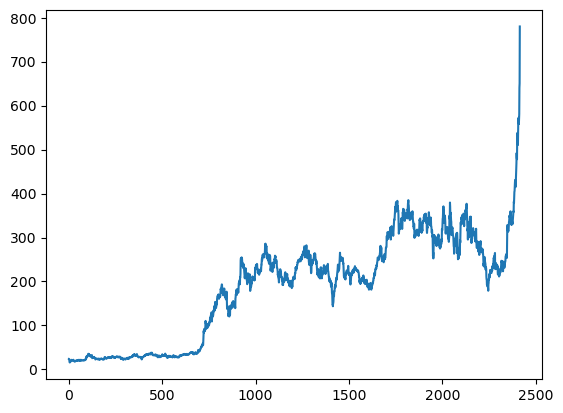

In [27]:
df['Close'].plot()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [28]:
b = (df['Open'].min(), df['Open'].max())
df['Open'] = df['Open'].apply(lambda x: (x - b[0]) / (b[1] - b[0]))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,0.004349,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,0.014676,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,0.013474,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,0.010433,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,0.005870,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,0.840012,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,0.850962,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,0.937237,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,0.948764,653.000000,632.520020,650.570007,650.570007,15719300


5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

In [29]:
sma = (
    df['Close'].rolling(window=12).mean(),
    df['Close'].rolling(window=15).mean(),
    df['Close'].rolling(window=30).mean(),
)

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

<Axes: >

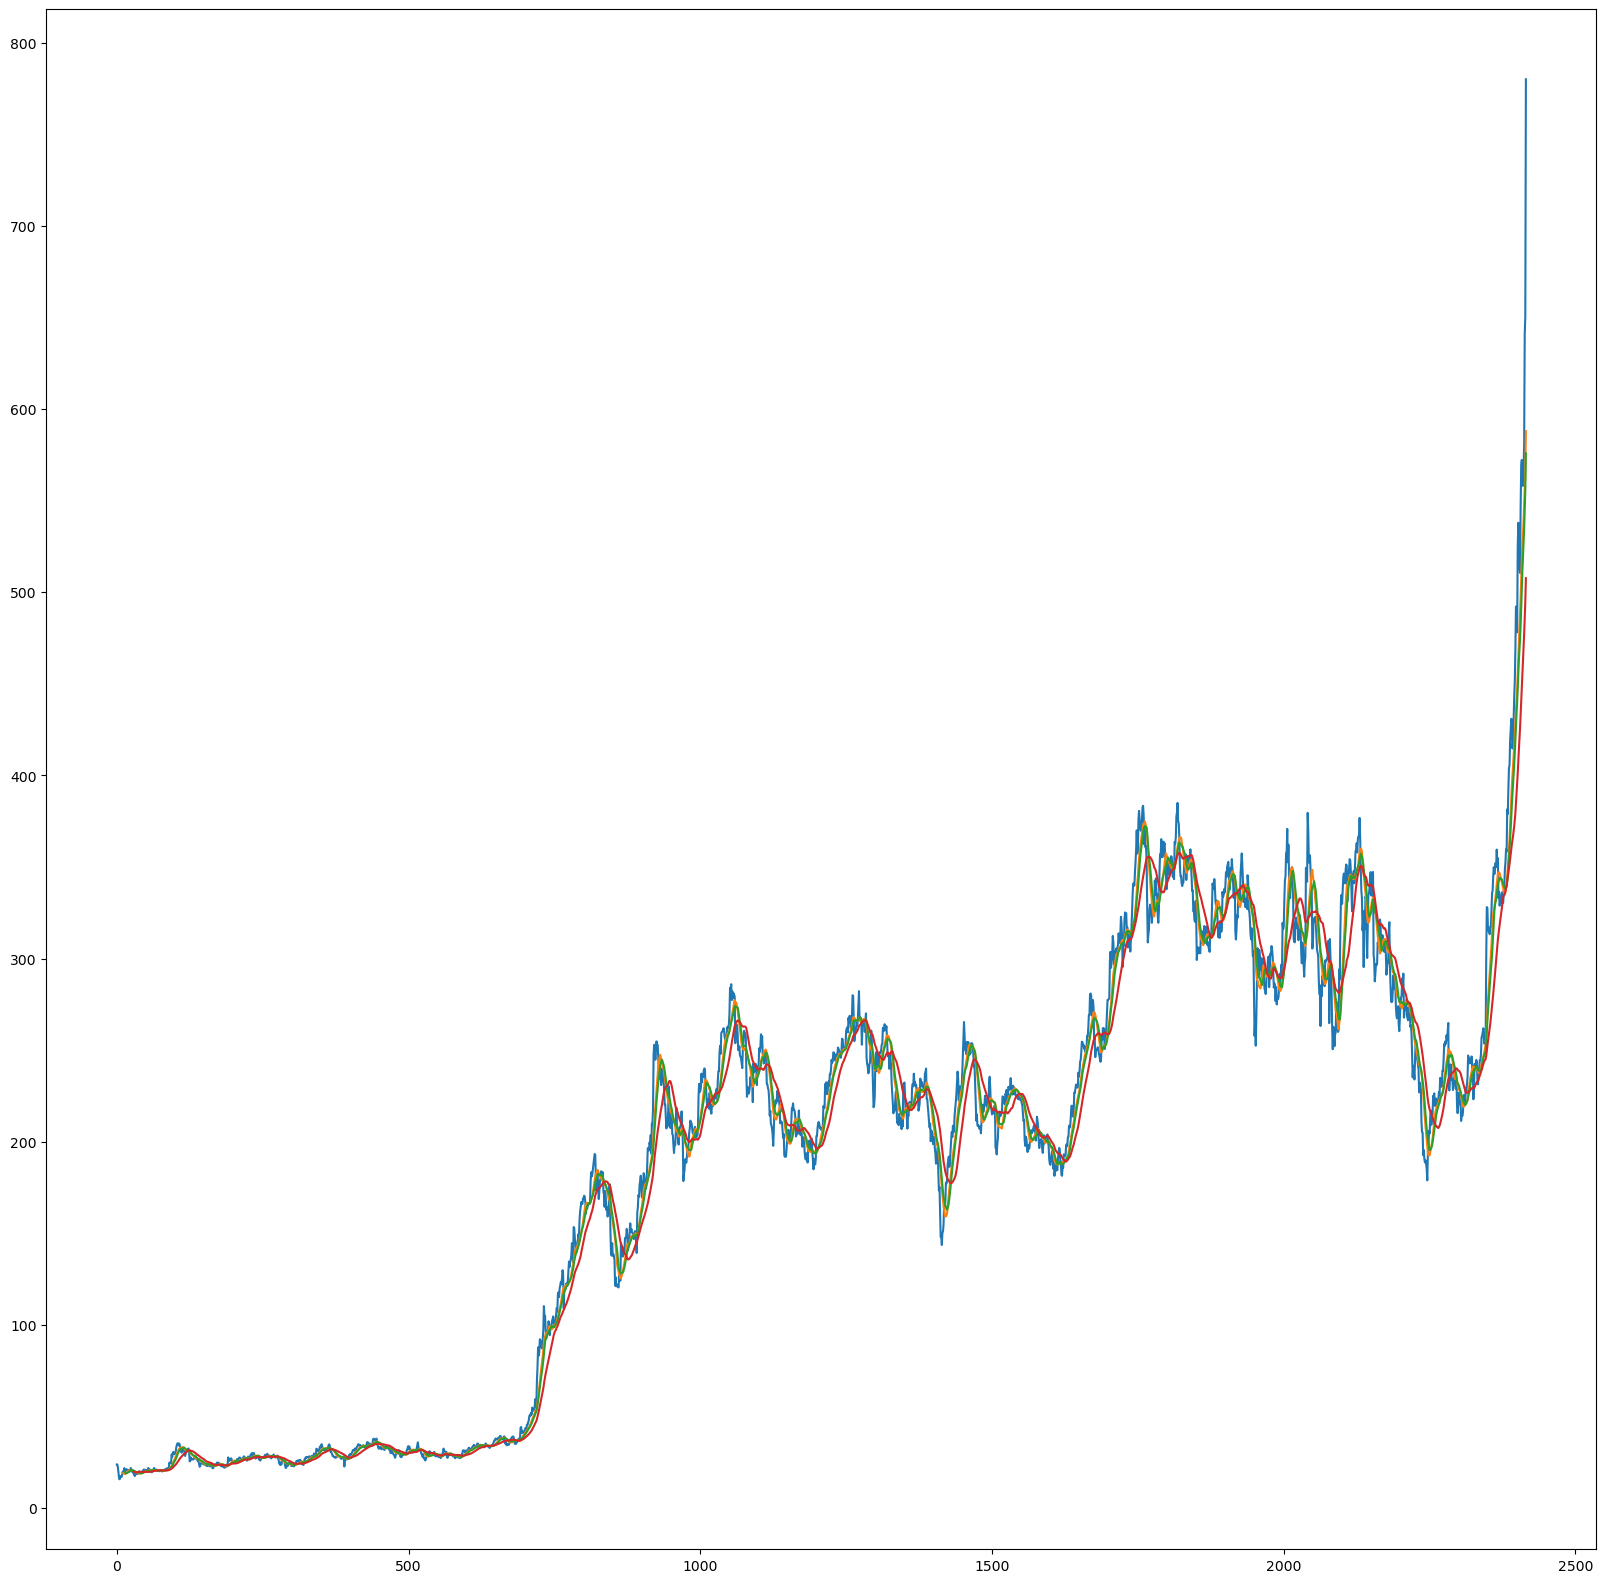

In [30]:
df['Close'].plot(figsize=(20 ,20))
sma[0].plot()
sma[1].plot()
sma[2].plot()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

Если цена закрытия превосходит SMA, рекомендуется покупать акции. Если, наоборот, SMA превосходит цену закрытия, Акции стоит продавать. SMA 30 следует за изменениями медленнее, чем другие SMA, что позволяет получить более долгосрочную картину.